In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from contour import init_pol, init_random, count_links, index_links

## Klasteriai Wolff algoritme

Skaitant apie Wolff algoritmą pastebėjau įdomią sukinių domenų interpretaciją.

Wolff interpretacijoje klasteriai yra suformuojami imant kaimynus su tam tikra nuo temperatūros priklausiančia tikimybe. To pasekoje, kai kurie kaimyniniai sukiniai būdami vienakrypčiai gali būti nepasirinkti ir "pažymimas" nebūtinai visas domenas. Visgi tai leidžia suformuoti acceptance ratios, kurie tenkina detalaus balanso sąlygą ir leidžia pasiekti pusiausvyrą gardelėje.

Šalia Newman vadovėlyje buvo pateiktas kitas būdas pasirinktis klasterius. Vietoje to, kad rekursijos būdu formuojamas klasteris, galima visus esamus sukinius sujungti pagal tam tikrą Wolff acceptance ratio padiktuotą tikimybę. Žr. žemiau paveikslėlį. Problema tame, kad iš visų padarytų klasterių su jungtimis bus panaudotas tik vienas apvertimui. Todėl atlikti skaičiavimams jis nepataogus. O jeigu mes galime panaudoti visus klasterius?

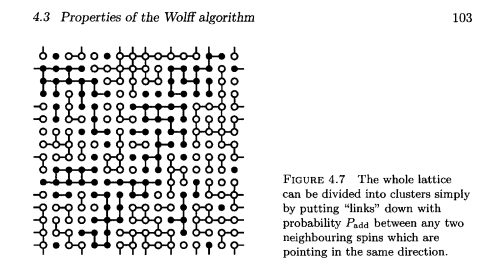

Toks sujungimas gali būti patogus, nes jungčių kiekį klasteryje (arba įvairovės indeksui reikalingame domene) galima įvertinti kiekybiškai. Intuityviai svarstant - didžiausias jungčių skaičius yra poliarizacijos atveju, o tvarkingo išsimaišymo (šachmatų atveju) - lygus 0. Šachmatų atveju visada visi kaimynai priešingi. Poliarizacijos atveju jungčių nebus tik domenų interface'o srityje (šis savo forma gali priklausyti nuo magnetizacijos).

Vietoje Newman vadovėlio algoritme siūlomų jungčių parinkimo su tikimybe, galima sujungti visus tinkamus kaimynus.

Žemiau parodytas jungčių skaičius šachmatų ir poliarizacijos atvejais. Byloje contour.py yra parašytos funkcijos atlikti operacijoms.


1984.0


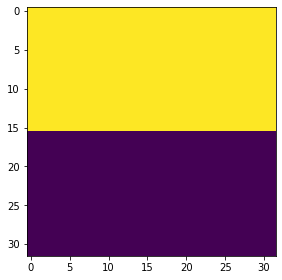

In [2]:
N = 32
m = 0

poliarizacija = init_pol(N, m)

plt.imshow(poliarizacija)
print(count_links(poliarizacija))

0.0


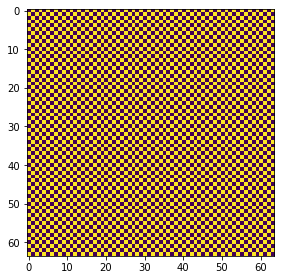

In [3]:
data = np.ones((64, 64))
data[::2, ::2] = 0
data[1::2, 1::2] = 0

plt.imshow(data)
print(count_links(data))

Toliau galima pabandyti patyrinėti atsitiktinį atvejį. Čia tik svarbus magnetizacijos kaip parametro parinkimas. Pasikeitus gardelės magnetizacijai kartu pasikeis ir didžiausias įmanomas jungčių skaičius, t.y. skaičius gaunamas poliarizacijos atveju. Todėl pabandykime suformuoti gardelę su pastoviomis magnetizacijos vertėmis.

Žemiau pateikti atvejai vienai gardelei ir didesniam atvejų skaičiui, kad įvertinti ar jungčių tarp sukinių dydis yra pastovus atsitiktiniam atvejui.

1030.0


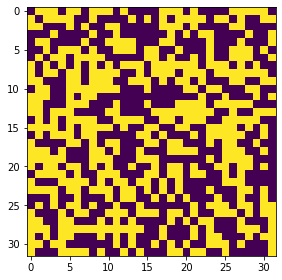

In [4]:
rng = np.random.default_rng(seed=727)
plt.imshow(init_random(N, m, rng))
print(count_links(init_random(N, m, rng)))

In [5]:
rr = np.zeros(1000)

for i in range(1000):
    rr[i] = count_links(init_random(N, m, rng))
    
print('Poliarizacijos atveju jungčių sk.:',count_links(poliarizacija))
print('Atistikiniam atvejui:')
print('Vidurkis:', np.mean(rr))
print('Mediana:' ,np.median(rr))
print('95% patikimumo intervalas:', np.percentile(rr,[2.5,97.5]))

Poliarizacijos atveju jungčių sk.: 1984.0
Atistikiniam atvejui:
Vidurkis: 1021.946
Mediana: 1022.0
95% patikimumo intervalas: [ 980. 1066.]


## Jungčių skaičiaus priklausomybė nuo magnetizacijos

Panašu, jog vertė nėra visiškai atsitiktinė ir nėra ypač dideliai išsisklaidžiusi. Šitas rezultatas panašu yra nesusijęs su mūsų prieš tai gauto atsitiktinio atvejo, pavyzdžiui, standartiniam nuokrypiui, t.y. proporcingumas $1/\sqrt{K}$, ar proporcingumo Theil indeksui.

Čia galima nuspėti kitą priklausomybę - magnetizacija lemia kokių sukinių gardelėje bus daugiausia. Ši sukinių dauguma nulemia jungčių skaičių ir, natūralu, domenus. Kuo labiau magnetizacija (intensyvus dydis) nukrypusi nuo simetriškos padėties (m=0), tuo daugiau bus jungčių ir atsitiktiniu atveju.

Žemiau yra kodas, kuris suskaičiuoja atsitiktinio atveju jungčių skaičių skirtingoms magnetizacijoms. Gale pavaizduota gauta priklausomybė. X ašyje yra $m$, o Y ašyje $r/p$, kur $r$ žymi jungčių skaičių atsitiktiniu atveju, o $p$ - tos pačios magnetizacijos gardelės poliarizacijos atveju.

In [6]:
N = 32
M = np.linspace(-0.99, 0.99, 100)
rng = np.random.default_rng(seed = 727)
n0 = 500


p = np.zeros(len(M)) #poliarizacija
r = np.zeros(len(M)) #atsitiktinis ismaisymas
band = np.zeros((len(M), 2))

for im, m in enumerate(M):
    
    x = np.zeros(n0)
    
    for i in range(n0):
        
        x[i] = count_links(init_random(N, m, rng))
        
    p[im] = count_links(init_pol(N, m))
    r[im] = np.median(x)
    band[im,:] = np.percentile(x, [2.5, 97.5])

In [7]:
def func1(x, a, b, c, d):
    return a*np.power(x+b, c)+d
def func2(x, a, b, c, d):
    return 2**(b*np.abs(x)+c)+d

popt, pcov = curve_fit(func2, M, r/p, maxfev=100000)

E:\Program Files\Anaconda\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


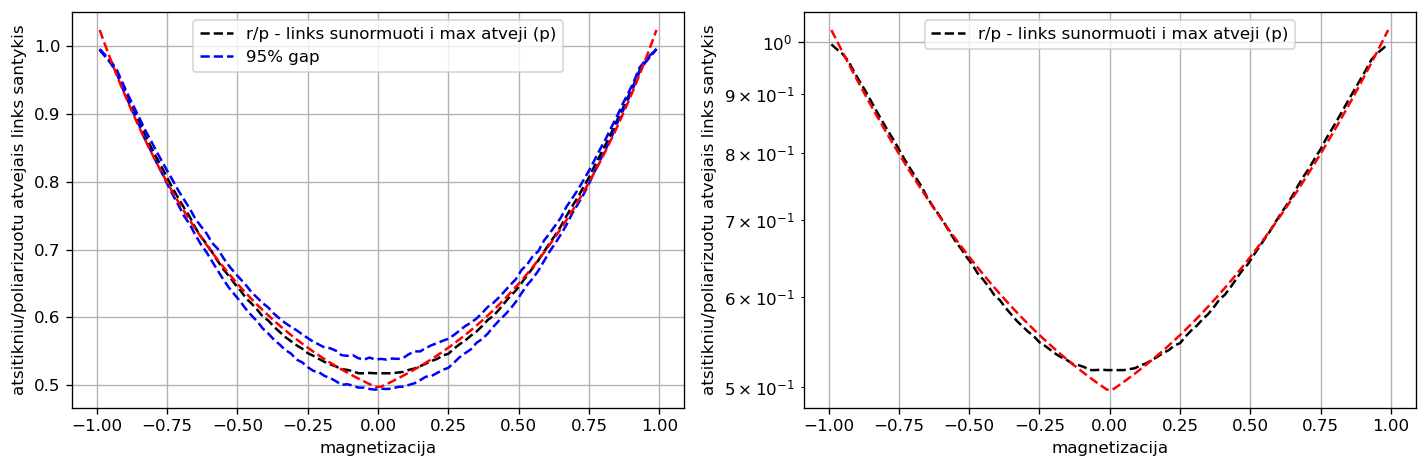

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), dpi=120)

ax[0].plot(M, r/p, 'k--', label='r/p - links sunormuoti i max atveji (p)')
ax[0].plot(M, band[:,0]/p, 'b--', label='95% gap')
ax[0].plot(M, band[:,1]/p, 'b--')

ax[0].plot(M, func2(M, *popt), 'r--')

#plt.yscale('log')
ax[0].set_xlabel('magnetizacija')
ax[0].set_ylabel('atsitikniu/poliarizuotu atvejais links santykis')
ax[0].legend()
ax[0].grid()

ax[1].plot(M, r/p, 'k--', label='r/p - links sunormuoti i max atveji (p)')
#ax[1].plot(M, band[:,0]/p, 'b--', label='95% gap')
#ax[1].plot(M, band[:,1]/p, 'b--')

ax[1].plot(M, func2(M, *popt), 'r--')

ax[1].set_yscale('log')
ax[1].set_xlabel('magnetizacija')
ax[1].set_ylabel('atsitikniu/poliarizuotu atvejais links santykis')
ax[1].legend()
ax[1].grid()

plt.tight_layout()

In [9]:
popt #koeficientai a, b, c, d is func1

array([ 1.        ,  2.65331037, -3.29227863,  0.39373779])

## Pastebėjimai:

Pabandžiau užfittinti šią funkciją pagal laipsninę (func2 aukščiau kode), tai rezultatai atkartoja kilimą nenulinei magnetizacijai. Bendrai priklausomybės rezultatai intuityviai suprantami - kai $m=0$ apie pusę kaimynų bus priešingos orientacijos, todėl jungčių skaičius sumažėja bene dvigubai ir yra mažiausias įmanomas. Kodėl sumažėja dvigubai, tai galvoju dėl pasirinkto kaimynų skaičiaus? Atsitiktiniu atveju apie pusę sukinio kaimynų turėtų būti priešingi. Išraiška susieti $r/p$ su $m$:

$$\frac{r}{p} = 2^{b \cdot |m| + c}+d,$$
čia $b$, $c$ ir $d$ yra konstantos, $|m|$ magnetizacijos modulis, $r$ jungčių skaičius pasirinktai magnetizacijai atsitiktiniu atveju, o $p$ yra jungčių sk. tvarkingo išsidėstymo atveju.

Kitas dalykas, kurį galima pastebėti tai domenų forma taip pat yra užfiksuojama. Pavyzdžiui, jeigu turėtume apskritimą tai ant interface esantys kaimynai turėtų tik 2 jungtis su saviškiais, o tiesi linija duoda 3 kaimynus. Todėl didesnė poliarizacija gaunasi tais atvejais, kai Izingo modelyje yra efektyviausia energija.

Iš jungčių skaičiaus galima skaičiuoti indeksą mums jau anksčiau apsibrėžtomis vertėmis, t.y. atitinkamiems atvejams -1, 0 ir 1. Deja, atvejais kai $m \neq 0$ "verčių" atstumai nuo atsitiktinio modelio iki kraštinių atvejų nėra lygūs, tad vertėtų naudoti jūsų pasiūlytą metodiką. Tačiau matyti, jog yra simetrija pagal magnetizaciją ir žinant funkcinę išraišką galima sukurti patogesnę formulę?

Dabar kai šitas turi didesnį plotą tarp šachmatų, o prieš tai buvęs tarp poliarizacijos ir atsitiktinio atvejo - galbūt kiekviena iš skaičiavimo metodikų jautresnė skirtingoms sritims?

## Naujoje skalėje (jungčių sk.) indekso skaičiavimas pagal ankstesnę metodiką

Toliau galima pabandyti įvertinti įvairovės indekso skaičiavimą Izingo ar rinkėjo modeliams. Vienas svarbesnių dalykų - pažiūrėti ar toks skaičiavimas atkartotų (būtų panašus) prieš tai gautoms vertems Izingo modeliui kritiniame taške, paramagnetinėje ir feromagnetinėje srityse (skaičiuosime pagal Metropolio ir Wolff algoritmus).

$$ i = \begin{cases}
\frac{l-r}{p-r} & \text{if}\: l > r , \\
\frac{l-r}{r} & \text{otherwise} .
\end{cases} $$

čia $l$ yra jungčių skaičius turimam atvejui gardelei, o $r$ ir $p$ kaip ir prieš tai. Jungčių santykį $r/p$ pažymėjus bendrai funkcijos išraiška:
$$ \frac{r}{p} = f(m),$$
galima ankstesnį $i$ skaičiavimą išreikšti taip (1):
$$ i = \begin{cases}
\frac{l}{p(1-f(m))} - \frac{f(m)}{1-f(m)} & \text{if}\: l > p \cdot f(m) , \\
\frac{l}{p \cdot f(m)} - 1 & \text{otherwise} .
\end{cases} $$

Visgi ši formulė nebūtinai paranki, vis dar dviejų aukštų. Tačiau tai, jog šachmatų atveju jungčių skaičius yra lygus nuliui, gali būti panaudotas apjungti į grąžesnę išraišką. Abiejose $i$ dalyse yra dalikliai, t.y. $p-r$ ir $r$. Norime, jog priklausomai nuo reiškinio $l-r$ ženklo keistųsi koeficientas prie $p$ (1 arba 0) ir ženklas prie $r$ (+ arba -). Tai galima padaryti ženklo funkcijos (sgn$(x)$) pagalba. Šiuo atveju naudojames funkcijos vertėmis sgn$(l-r)$:

$$i = \frac{l-r}{p\cdot\frac{\textrm{sgn}(l-r)+1}{2} - r\cdot\textrm{sgn}(l-r)},$$

pasinaudojame žinomu funkciniu sąryšiu $r = p \cdot f(m)$, įstatome jį ir atskiriame dvi dalis - vieną be sgn funkcijos (viršutinis narys ir apačioje iškeltas p), o kitą su sgn funkcija ir kas šalia lieka:

$$i = \frac{l - p \cdot f(m)}{p} \cdot \frac{2}{\textrm{sgn}[l-p\cdot f(m)]+1 - 2 \cdot f(m) \cdot \textrm{sgn}[l-p\cdot f(m)] }
= \frac{l - p \cdot f(m)}{p} \cdot \frac{2}{(1 - 2\cdot f(m))\cdot\textrm{sgn}[l-p\cdot f(m)]+1 }$$

Jeigu analiziškai galima išsivesti poliarizacijos jungčių skaičiaus $p$ priklausomybę nuo gardelės dydžio ir magnetizacijos, tuomet įvairovės indeksui suskaičiuoti užtenka įvertinti $l$ ir $m$.

Žemiau apskaičiuotos indekso vertės pagal prie (1) nurodytą formulę, contour.py byloje atitinka funkciją *index_links()*. Pradžioje rezultatai pagal Wolff algoritmą, po to Metropolio ir tada dar įdėjau tai ką turėjome pagal ankstesnę skaičiavimo metodiką.

In [10]:
#Wolff old index
t1, g11, i1, g12 = np.loadtxt('data/index-cluster-wolff-500-1000-b1.txt')
t2, g21, i2, g22 = np.loadtxt('data/index-cluster-wolff-500-1000-b2.txt')
t3, g31, i3, g32 = np.loadtxt('data/index-cluster-wolff-500-1000-b3.txt')

#Metropolis old index
import pandas as pd
df4 = pd.read_csv('data/ising-64.sorted.csv', header = None)

df4.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

t4, m4, b4, a4, i4, d4, c4 = df4['A'].values, df4['B'].values, df4['C'].values, df4['D'].values, df4['E'].values, df4['F'].values, df4['G'].values

#Metropolis new index
t5, g51, i5, g52, m5 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x1.txt')
t6, g61, i6, g62, m6 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x2.txt')
t7, g71, i7, g72, m7 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x3.txt')
t8, g81, i8, g82, m8 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x4.txt')

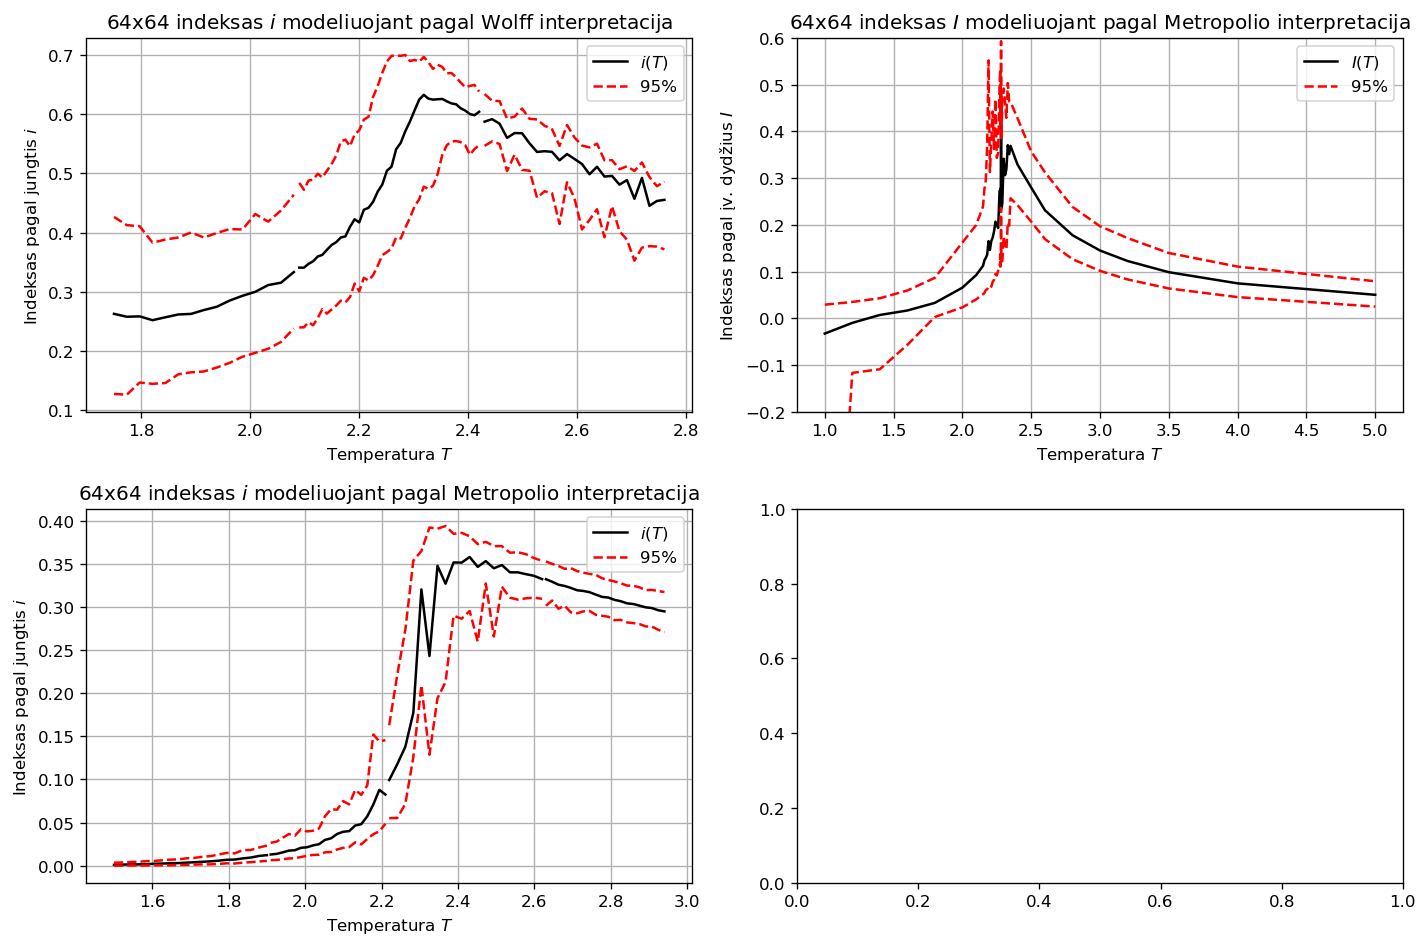

In [15]:
fig, ax = plt.subplots(2,2,figsize=(12,8), dpi = 120)

ax[0,0].plot(t1, i1, 'k-',label='$i$($T$)')
ax[0,0].plot(t2, i2, 'k-')
ax[0,0].plot(t3, i3, 'k-')

ax[0,0].plot(t1, g11, 'r--',label='95%')
ax[0,0].plot(t2, g21, 'r--')
ax[0,0].plot(t3, g31, 'r--')

ax[0,0].plot(t1, g12, 'r--')
ax[0,0].plot(t2, g22, 'r--')
ax[0,0].plot(t3, g32, 'r--')

ax[0,0].set(xlabel='Temperatura $T$', ylabel='Indeksas pagal jungtis $i$', title='64x64 indeksas $i$ modeliuojant pagal Wolff interpretacija')
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(t4, i4, 'k-', label='$I$($T$)')
ax[0,1].plot(t4, d4, 'r--', label='95%')
ax[0,1].plot(t4, c4, 'r--')

ax[0,1].set(xlabel='Temperatura $T$', ylabel='Indeksas pagal įv. dydžius $I$', title='64x64 indeksas $I$ modeliuojant pagal Metropolio interpretacija', ylim=[-0.2, 0.6])
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].plot(t5, i5, 'k-',label='$i$($T$)')
ax[1,0].plot(t6, i6, 'k-')
ax[1,0].plot(t7, i7, 'k-')
ax[1,0].plot(t8, i8, 'k-')

ax[1,0].plot(t5, g51, 'r--',label='95%')
ax[1,0].plot(t6, g61, 'r--')
ax[1,0].plot(t7, g71, 'r--')
ax[1,0].plot(t8, g81, 'r--')

ax[1,0].plot(t5, g52, 'r--')
ax[1,0].plot(t6, g62, 'r--')
ax[1,0].plot(t7, g72, 'r--')
ax[1,0].plot(t8, g82, 'r--')

ax[1,0].set(xlabel='Temperatura $T$', ylabel='Indeksas pagal jungtis $i$', title='64x64 indeksas $i$ modeliuojant pagal Metropolio interpretacija')
ax[1,0].grid()
ax[1,0].legend()

In [12]:
t5, g51, i5, g52 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x1.txt')
t6, g61, i6, g62 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x1.txt')
t7, g71, i7, g72 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x1.txt')
t8, g81, i8, g82 = np.loadtxt('data/2links-index-metropolis-64-2k-6k-x1.txt')

ValueError: too many values to unpack (expected 4)

Izingo modelis pagal Wolff interpretaciją duoda didokas vertes naujam indeksui. Padidėjimas yra feromagnetinėje srityje, bet mažėjimas paramagnetinėje yra nepakankamas. Galbūt yra kažkokia klaida jungčių skaičiavime, kadangi rezultatas feromagnetinėje srityje vis tiek neatrodo teisingas. Izingo modelis pagal Metropolio interpretacija su nauju indeksu duoda mažas vertes, gal net identiškas tam kas turėta anksčiau?

Bendrai atrodo, kad nieko iš esmės nepakeičia tokio indekso skaičiavimas. Galbūt tada klausimas išlieka indekso skaičiavimo metodologijoje? Jo padarymas tarp -1,0 ir 1? Įdomu, nes skaičiuojant skirtingus dalykus gaunamas toks pat rezultatas.

## Indeksas ir empiriniai duomenys

Kadangi toks skaičiavimo būdas vertina tarpusavio atžvilgiu sukinius, tai be geografijos čia neišsukama. JK 2011 surašymui reikėtų bandyti įvertinti duomenis pagal geografiją.

Kitas dalykas su jungtimis - dabar jos neturi svorio. Iš esmės jeigu kaimynai vienodi, įskaitome jungtį kaip vienetą. Tačiau duomenys, kaip JK empirinių atveju, gali būti intervale $[0,1]$. Tokiu atveju būtų galima suteikti jungčiai svorį, kuris būtų skirtumas tarp būseną nusakančių verčių. Pvz., svoris tarp kaimynų 0.3 ir 0.8 būtų 0.5. Bendra jungčių verčių suma priklauso nuo išsidėstymo:

a) 1 0.3 0.7 0.8 0.2, $l_{sum}$ = 1.8

b) 1 0.8 0.7 0.3 0.2, $l_{sum}$ = 0.9

b atveju matome atskirtį, o a - atsitiktinį atvejį? Svorių suma gautųsi skirtinga.